# Handwritten Digit Classification (MNIST): Impact of Data Augmentation on Model Generalization
**Project: Digital Systems Design using High-Level Languages (ESL)**

### Experiment Objective
The primary objective of this experiment is to quantitatively assess the impact of **data augmentation** techniques on the generalization capabilities and robustness of Convolutional Neural Networks (CNNs). By artificially expanding the training dataset through geometric transformations, we aim to mitigate overfitting and improve classification accuracy on unseen data.

### Methodology
The experiment involves a comparative analysis of two training scenarios using an identical CNN architecture:
1.  **Baseline Model (Model A):** Trained on the standard, static MNIST dataset (60,000 images).
2.  **Augmented Model (Model B):** Trained using dynamic, real-time data augmentation.

### Evaluation Metrics
Performance is evaluated using:
* Validation Accuracy and Loss curves over epochs.
* Confusion Matrices to identify specific misclassification patterns.
* Precision, Recall, and F1-Score metrics.

## 1. Environment Setup and Dependency Management

In this section, the execution environment is configured. This includes cloning the project repository, installing required dependencies from `requirements.txt`, and importing necessary system and machine learning libraries. Custom modules for data handling, model training, and evaluation are also loaded.

### Environment Setup (Google Colab only)
Uncomment and run the cell below **only** if you are running this notebook in Google Colab or a similar ephemeral cloud environment. It clones the repository and installs necessary dependencies.
For local execution, ensure requirements are installed via `pip install -r requirements.txt`.

In [ ]:
import os
import sys

# --- Environment Setup (Google Colab only) ---
# Uncomment only if running in Google Colab
# repo_name = "handwritten-digit-classifier-augmentation"
# if 'google.colab' in sys.modules:
#     if not os.path.exists(repo_name):
#         !git clone https://github.com/BeneNat/handwritten-digit-classifier-augmentation.git
#     os.chdir(repo_name)
#     !pip install -r requirements.txt
#     print("Colab setup complete.")
# else:
#     print("Local environment detected.")

# --- Local Path Setup ---
# Add the parent directory to sys.path to allow imports from 'src'
# when running locally from the 'notebooks/' folder.
if 'google.colab' not in sys.modules:
    project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
    if project_root not in sys.path:
        sys.path.append(project_root)

# --- Imports ---
import numpy as np
import matplotlib.pyplot as plt

# Now these imports will work correctly both locally and in Colab
from src.data import load_data
from src.train import train, train_no_augmentation
from src.evaluate import (
  plot_accuracy_comparison,
  plot_loss_comparison,
  plot_confusion_matrix_single,
  plot_confusion_matrices_side_by_side,
  show_example_predictions,
  print_classification_report,
  show_image_grid,
)

## 2. Data Acquisition and Preprocessing

The MNIST dataset is loaded from the TensorFlow/Keras repository. The preprocessing pipeline includes:
* **Reshaping:** Converting flat vectors into (28, 28, 1) 3D tensors compatible with Convolutional layers.
* **Normalization:** Scaling pixel values from the range [0, 255] to [0, 1] to ensure numerical stability during training.
* **One-Hot Encoding:** Converting class labels into categorical vectors.

In [3]:
x_train, y_train, x_test, y_test = load_data()
print("Shapes:")
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

Shapes:
x_train: (60000, 28, 28, 1)
y_train: (60000, 10)
x_test: (10000, 28, 28, 1)
y_test: (10000, 10)


The samples below visualize the input data distribution.

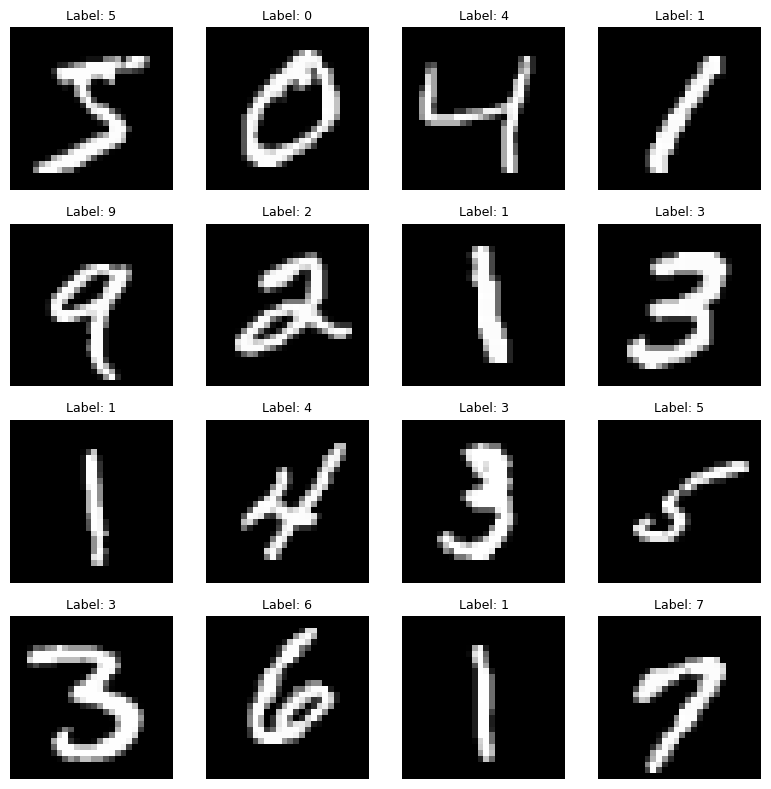

In [4]:
show_image_grid(x_train[:16], labels=np.argmax(y_train[:16], axis=1))

## 3. Baseline Model Training (Non-Augmented)

We proceed to train the reference CNN model using the raw, static training dataset. This baseline serves as a control group to measure the incremental benefits of data augmentation.

**CNN Architecture Specification:**
* **Input Layer:** 28x28x1 grayscale image.
* **Feature Extraction:** Two Convolutional layers (32 and 64 filters) with ReLU activation, followed by Max Pooling.
* **Classification Head:** Flatten layer, Dense hidden layer (128 units, ReLU), and Output Dense layer (10 units, Softmax).

In [5]:
history_no_aug, model_no_aug = train_no_augmentation(epochs=5, batch_size=25)

Epoch 1/5
2400/2400 [==============================] - 104s 43ms/step - loss: 0.1074 - accuracy: 0.9675 - val_loss: 0.0540 - val_accuracy: 0.9835
Epoch 2/5
2400/2400 [==============================] - 117s 49ms/step - loss: 0.0372 - accuracy: 0.9885 - val_loss: 0.0347 - val_accuracy: 0.9888
Epoch 3/5
2400/2400 [==============================] - 117s 49ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0436 - val_accuracy: 0.9864
Epoch 4/5
2400/2400 [==============================] - 96s 40ms/step - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0319 - val_accuracy: 0.9903
Epoch 5/5
2400/2400 [==============================] - 124s 52ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0369 - val_accuracy: 0.9907
Model saved to: ../results/models/cnn_normal.keras


## 4. Augmented Model Training

The second model is trained using an `ImageDataGenerator`. Unlike the baseline, this model receives input batches that are dynamically transformed in real-time on the CPU before being fed into the GPU for training. This forces the network to learn invariant features rather than memorizing specific pixel patterns.

**Augmentation Parameters (`src/augment.py`):**
* **Rotation Range:** ±10 degrees
* **Width Shift:** ±10% of total width
* **Height Shift:** ±10% of total height
* **Zoom Range:** ±10% scaling

In [6]:
history_aug, model_aug = train(epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 109s 57ms/step - loss: 0.2245 - accuracy: 0.9300 - val_loss: 0.0434 - val_accuracy: 0.9858
Epoch 2/5
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0822 - accuracy: 0.9748 - val_loss: 0.0314 - val_accuracy: 0.9903
Epoch 3/5
1875/1875 [==============================] - 112s 59ms/step - loss: 0.0629 - accuracy: 0.9805 - val_loss: 0.0327 - val_accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0512 - accuracy: 0.9838 - val_loss: 0.0260 - val_accuracy: 0.9908
Epoch 5/5
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0458 - accuracy: 0.9853 - val_loss: 0.0390 - val_accuracy: 0.9883
Model saved to: ../results/models/cnn_augmented.keras


## 5. Comparative Performance Analysis

The following plots illustrate the training trajectory for both models.
* **Validation Accuracy:** Indicates generalization capability. A higher and more stable curve suggests better performance on unseen data.
* **Validation Loss:** Represents the error rate. Divergence between training and validation loss in the baseline model would indicate overfitting, which augmentation aims to reduce.

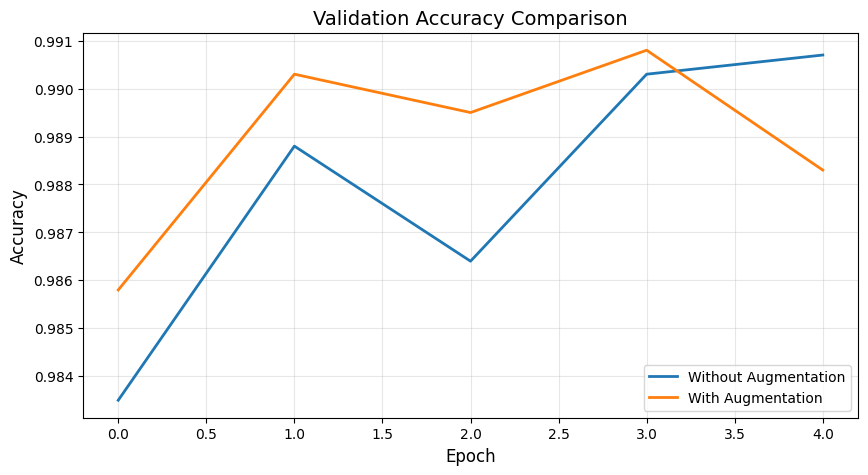

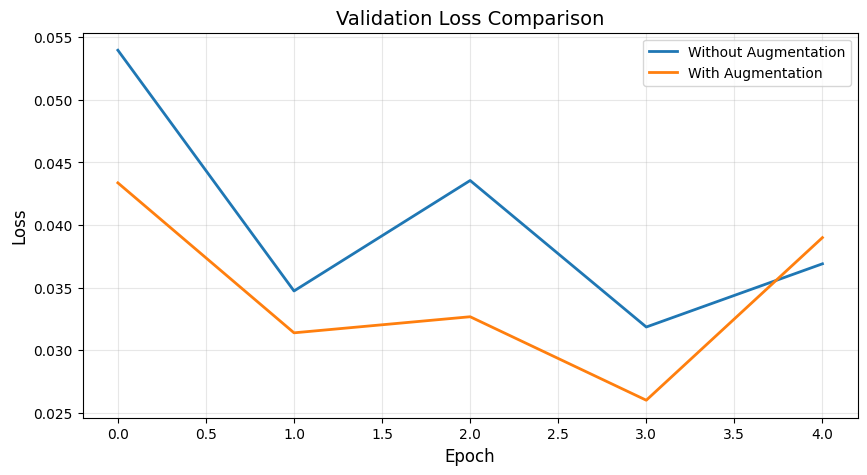

In [10]:
plot_accuracy_comparison(history_no_aug, history_aug)
plot_loss_comparison(history_no_aug, history_aug)

## 6. Final Validation Metrics

Quantitative comparison of the final accuracy achieved by both models on the test set after the completion of all training epochs.

In [11]:
print("Final validation accuracy:")
print("No augmentation:", history_no_aug.history['val_accuracy'][-1])
print("With augmentation:", history_aug.history['val_accuracy'][-1])

Final validation accuracy:
No augmentation: 0.9907000064849854
With augmentation: 0.9883000254631042


## 7. Error Analysis: Confusion Matrices

Confusion matrices provide a granular view of prediction errors. They allow us to identify specific digit pairs that the models struggle to distinguish (e.g., differentiating between '4' and '9' or '3' and '8').
* **Diagonal elements** represent correct classifications.
* **Off-diagonal elements** represent misclassifications.

313/313 [==============================] - 4s 13ms/step


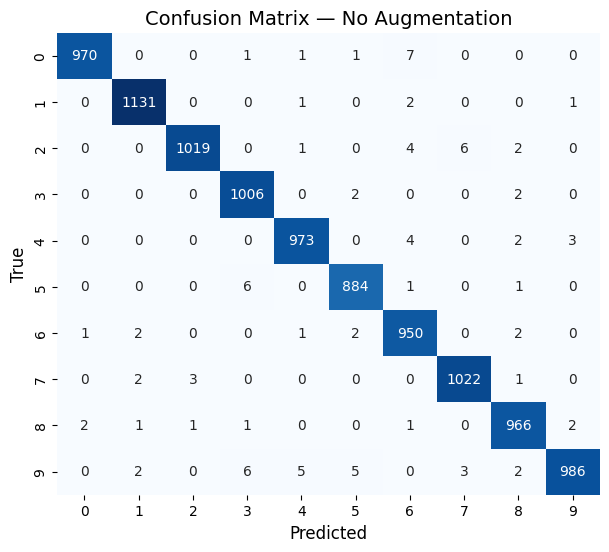

313/313 [==============================] - 4s 11ms/step


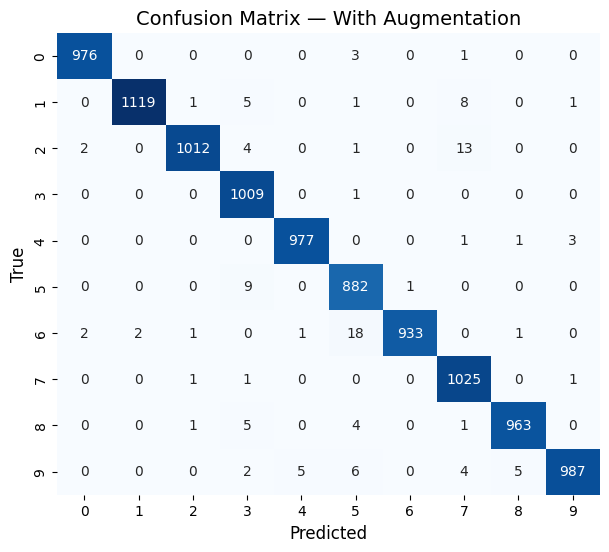

313/313 [==============================] - 3s 10ms/step


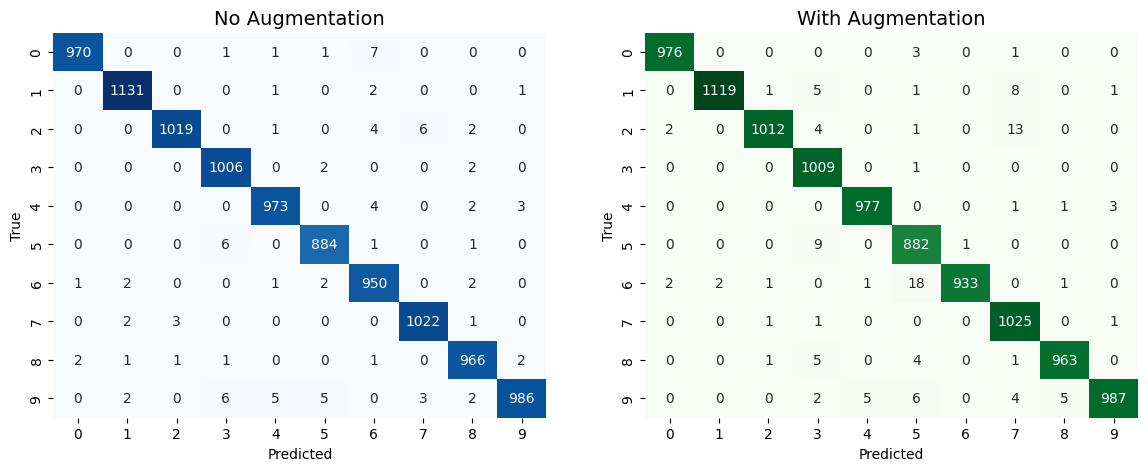

In [12]:
plot_confusion_matrix_single(model_no_aug, x_test, y_test, title="Confusion Matrix — No Augmentation")
plot_confusion_matrix_single(model_aug, x_test, y_test, title="Confusion Matrix — With Augmentation")
plot_confusion_matrices_side_by_side(model_no_aug, model_aug, x_test, y_test)

## 8. Detailed Classification Reports

A comprehensive summary of classification metrics for each digit class:
* **Precision:** The ratio of correctly predicted positive observations to the total predicted positives.
* **Recall (Sensitivity):** The ratio of correctly predicted positive observations to the all observations in actual class.
* **F1-Score:** The weighted average of Precision and Recall.

In [13]:
print("\nBASELINE MODEL REPORT")
print_classification_report(model_no_aug, x_test, y_test)

print("\nAUGMENTED MODEL REPORT")
print_classification_report(model_aug, x_test, y_test)


BASELINE MODEL REPORT
313/313 [==============================] - 4s 12ms/step

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000


AUGMENTED MODEL REPORT
313/313 [==============================] - 4s 12ms/step

Classification Report:

              precision    recal

## 9. Qualitative Prediction Analysis

Visual inspection of random samples from the test dataset. The predictions from both the Baseline and Augmented models are displayed alongside the ground truth labels to qualitatively assess robustness.

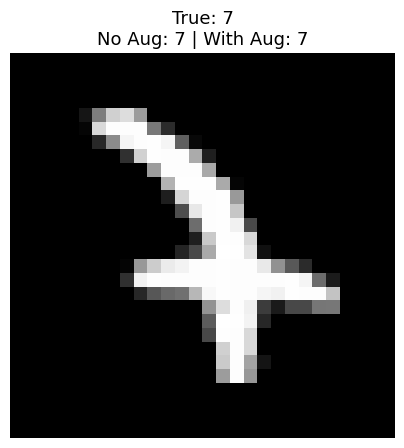

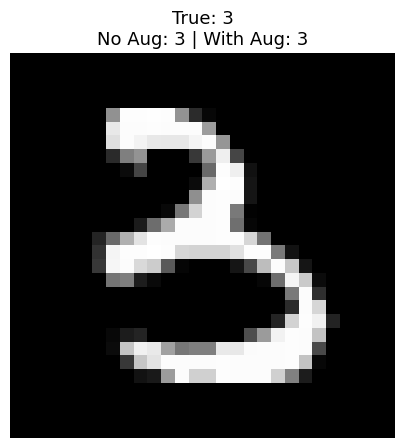

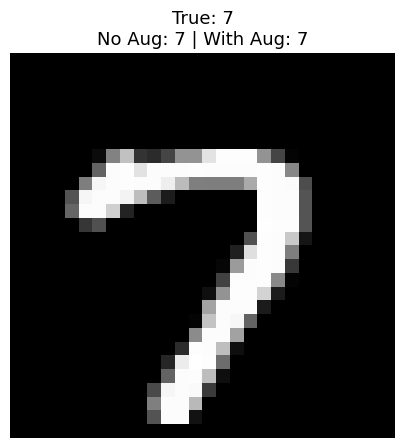

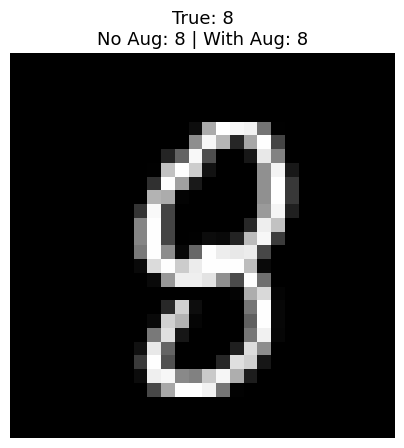

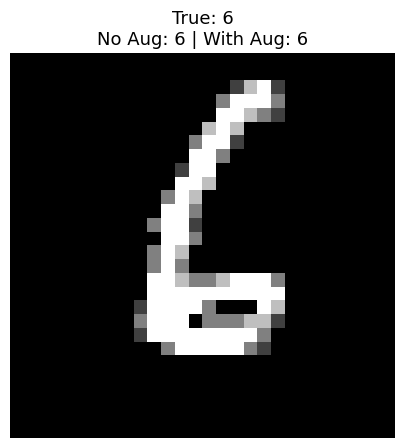

In [14]:
show_example_predictions(model_no_aug, model_aug, x_test, y_test, n=5)

## 10. Model Serialization

The final trained weights for both models are serialized and saved to the disk. This allows for future inference, deployment, or fine-tuning without the need for retraining.

In [15]:
model_no_aug.save("../results/models/cnn_no_aug_final.keras")
model_aug.save("../results/models/cnn_aug_final.keras")
print("Models saved.")

Models saved.
